# Importieren der Bibliotheken

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.express as pxc
from ipywidgets import interact


## Laden der Datei

In [ ]:
# Laden der Datei in ein Pandas DataFrame
datei_path = r"C:\Users\Kunde\Desktop\BNT_Technikerschule\Dr. Movsessian\Projekt Windkraftanlage\Features_for_SHAP32rpm_repaierd.txt"
df = pd.read_csv(datei_path)

# Anzeigen der ersten Zeilen des DataFrames
df.tail()

,Cov1_1,Cov1_2,Cov1_4,Cov1_5,Cov1_7,Cov1_8,Cov1_10,Cov1_11,Cov2_2,Cov2_4,...,DC2_RPM,Wind_Direction,Temperature,Preciptation,Generator_on_off,Power_kW,Pitch_deg,Yaw,Azimuth,novelty_index
2922,1926.096405,22.077982,175.857296,-45.826991,50.419635,-196.514162,-19.894280,17.230319,106.262023,73.319511,...,32.025182,225.3840,2.175221,0.005802,1.0,-0.203927,-0.204647,10.02373,-35.567223,19.300004
2923,1968.053957,1.849336,237.957362,-40.600944,37.026843,-172.434916,-17.566236,12.396130,92.356970,53.739386,...,32.024936,225.4025,2.175308,0.005802,1.0,-0.203776,-0.166080,10.02100,-35.075370,18.866672
2924,1878.377866,17.217453,313.894413,-33.844109,56.978583,-157.683324,-14.607295,7.955903,96.110466,57.960094,...,32.025416,224.6777,2.154097,0.005802,1.0,-0.202933,-0.446031,10.02232,-27.235961,19.676828
2925,1883.592661,56.197118,452.159911,-29.978124,108.109518,-139.086048,6.094632,11.027323,106.358605,72.326554,...,32.026613,220.8360,2.157872,0.005802,1.0,-0.202147,-0.475663,10.02020,6.454405,19.960807
2926,1888.385538,48.195217,431.133481,-29.426011,87.764201,-129.770940,21.244808,12.426216,108.380538,70.841707,...,32.031763,213.0807,2.180657,0.005802,1.0,-0.202552,-0.527526,10.03005,104.349985,22.522516


# Anzeige in Tabs (Jupyter Widgets)
## Mit Jupyter Widgets können Sie die Spalten in Tabs aufteilen, um die Anzeige zu erleichtern

In [140]:
def display_df_in_tabs(df, chunk_size=10):
    num_chunks = (len(df.columns) + chunk_size - 1) // chunk_size
    for i in range(num_chunks):
        start = i * chunk_size
        end = min((i + 1) * chunk_size, len(df.columns))
        chunk = df.iloc[:, start:end]
        tab = widgets.Tab(children=[widgets.Output(layout=widgets.Layout(width='auto')) for _ in range(len(chunk.columns))],
                          titles=list(chunk.columns))
        for j, col in enumerate(chunk.columns):
            with tab.children[j]:
                display(chunk[col])
        display(tab)

display_df_in_tabs(df)



## Hier beginnt die erste Analyse

In [141]:
df_2=df
print(df_2["Generator_on_off"].value_counts())


Generator_on_off
1.000000    2127
0.000000      31
0.888542       1
0.807813       1
0.701042       1
0.854167       1
0.658333       1
0.752083       1
0.475521       1
0.744271       1
0.857812       1
0.846354       1
Name: count, dtype: int64


In [142]:
df.columns

Index(['Cov1_1', 'Cov1_2', 'Cov1_4', 'Cov1_5', 'Cov1_7', 'Cov1_8', 'Cov1_10',
       'Cov1_11', 'Cov2_2', 'Cov2_4', 'Cov2_5', 'Cov2_7', 'Cov2_8', 'Cov2_10',
       'Cov2_11', 'Cov4_4', 'Cov4_5', 'Cov4_7', 'Cov4_8', 'Cov4_10', 'Cov4_11',
       'Cov5_5', 'Cov5_7', 'Cov5_8', 'Cov5_10', 'Cov5_11', 'Cov7_7', 'Cov7_8',
       'Cov7_10', 'Cov7_11', 'Cov8_8', 'Cov8_10', 'Cov8_11', 'Cov10_10',
       'Cov10_11', 'Cov11_11', 'WindSpeed', 'DC1_RPM', 'DC2_RPM',
       'Wind_Direction', 'Temperature', 'Preciptation', 'Generator_on_off',
       'Power_kW', 'Pitch_deg', 'Yaw', 'Azimuth', 'novelty_index'],
      dtype='object')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cov1_1            2927 non-null   float64
 1   Cov1_2            2927 non-null   float64
 2   Cov1_4            2927 non-null   float64
 3   Cov1_5            2927 non-null   float64
 4   Cov1_7            2927 non-null   float64
 5   Cov1_8            2927 non-null   float64
 6   Cov1_10           2927 non-null   float64
 7   Cov1_11           2927 non-null   float64
 8   Cov2_2            2927 non-null   float64
 9   Cov2_4            2927 non-null   float64
 10  Cov2_5            2927 non-null   float64
 11  Cov2_7            2927 non-null   float64
 12  Cov2_8            2927 non-null   float64
 13  Cov2_10           2927 non-null   float64
 14  Cov2_11           2927 non-null   float64
 15  Cov4_4            2927 non-null   float64
 16  Cov4_5            2927 non-null   float64


In [144]:

df.describe()

,Cov1_1,Cov1_2,Cov1_4,Cov1_5,Cov1_7,Cov1_8,Cov1_10,Cov1_11,Cov2_2,Cov2_4,...,DC2_RPM,Wind_Direction,Temperature,Preciptation,Generator_on_off,Power_kW,Pitch_deg,Yaw,Azimuth,novelty_index
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,...,2927.000000,2927.000000,2927.000000,2927.000000,2168.000000,2168.000000,2927.000000,2168.000000,2927.000000,2927.000000
mean,1747.931863,-2.260068,317.196271,-28.444858,46.515793,-159.859453,10.256604,18.023993,95.290987,65.304500,...,31.982444,219.890276,2.618653,0.009267,0.984588,-0.146232,-0.365317,9.947981,10.156601,6.983072
std,199.708307,39.504559,151.510188,19.806876,69.737599,27.411937,20.140408,9.595882,12.554723,30.339935,...,0.251218,80.914737,2.770315,0.071789,0.120005,0.431149,0.340793,0.661750,102.590188,3.508187
min,989.239237,-145.223071,-78.720347,-96.682045,-140.913708,-304.416136,-65.375506,-14.446204,65.348420,7.278890,...,30.000287,0.131618,-3.371019,-0.000454,0.000000,-0.880806,-1.426433,4.000000,-179.463434,2.764926
25%,1624.058779,-32.330924,189.466139,-41.199322,-10.279779,-177.269372,-5.901096,12.420366,85.870861,42.781594,...,32.009364,191.184350,0.959786,0.000000,1.000000,-0.214719,-0.484065,10.007517,-74.649448,4.726142
50%,1750.020173,-5.972418,321.332371,-28.991283,49.155240,-161.358001,10.987156,18.572368,94.012226,59.270103,...,32.025193,229.806000,2.269189,0.005649,1.000000,-0.197195,-0.263347,10.017120,13.881518,6.049983
75%,1876.425325,29.254731,442.783770,-16.136016,108.141518,-143.200508,25.728132,24.983788,103.875741,82.512411,...,32.030999,278.209200,4.478815,0.005802,1.000000,-0.175742,-0.124634,10.041622,100.276608,7.826569
max,2924.941275,106.863926,733.283649,51.777710,189.242296,-54.493735,73.917371,41.616833,145.757134,183.928483,...,32.102752,359.859600,11.945510,1.000000,1.000000,7.898488,-0.000035,10.136890,179.890022,31.580461


In [145]:




# Output-Widget erstellen
output = widgets.Output()

def erstelle_pairplot(szenario):
    with output:  # Nutzt das Output-Widget, um doppelte Ausgaben zu verhindern
        clear_output(wait=True)  # Vorherige Plots entfernen
        
        if szenario == 'Wind- und Leistungsdaten':
            spalten = ['WindSpeed', 'Power_kW', 'DC1_RPM', 'DC2_RPM']
            titel = 'Pairplot: Wind- und Leistungsdaten'
        elif szenario == 'Umweltbedingungen und Leistung':
            spalten = ['Temperature', 'Preciptation', 'Power_kW']
            titel = 'Pairplot: Umweltbedingungen und Leistung'
        elif szenario == 'Ausrichtung und Leistung':
            spalten = ['Pitch_deg', 'Yaw', 'Azimuth', 'Power_kW']
            titel = 'Pairplot: Ausrichtung und Leistung'

        else:
            print("Ungültiges Szenario")
            return

        try:
            plot = sns.pairplot(df[spalten])  # Pairplot erstellen
            plot.fig.suptitle(titel, y=1.02)  # Titel setzen
            plt.show()
        except Exception as e:
            print(f"Fehler: {e}")

# Dropdown für die Szenario-Auswahl
dropdown = widgets.Dropdown(options=['Wind- und Leistungsdaten', 'Umweltbedingungen und Leistung', 'Ausrichtung und Leistung'], description='Szenario:')

# Verknüpfe Dropdown mit der Funktion
dropdown.observe(lambda change: erstelle_pairplot(change['new']), names='value')

# Anzeige
display(dropdown, output)

# Initiale Anzeige
erstelle_pairplot(dropdown.value)


Dropdown(description='Szenario:', options=('Wind- und Leistungsdaten', 'Umweltbedingungen und Leistung', 'Ausr…

Output()

In [146]:
df[['WindSpeed', 'Power_kW', 'DC1_RPM', 'DC2_RPM']].corr()

,WindSpeed,Power_kW,DC1_RPM,DC2_RPM
WindSpeed,1.000000,-0.052118,0.229977,0.224250
Power_kW,-0.052118,1.000000,-0.012835,-0.015668
DC1_RPM,0.229977,-0.012835,1.000000,0.970119
DC2_RPM,0.224250,-0.015668,0.970119,1.000000


# Label gesund (0)
# Label Schaden (1)


In [147]:
import pandas as pd

df["label"] = 0  # Alle auf 0 setzen (gesund)
df.loc[1000:, "label"] = 1  # Ab dem 1001. Datensatz auf 1 setzen


In [148]:
df.head()

,Cov1_1,Cov1_2,Cov1_4,Cov1_5,Cov1_7,Cov1_8,Cov1_10,Cov1_11,Cov2_2,Cov2_4,...,Wind_Direction,Temperature,Preciptation,Generator_on_off,Power_kW,Pitch_deg,Yaw,Azimuth,novelty_index,label
0,1604.693964,15.539143,234.360731,-29.198898,-29.696108,-174.435498,5.294636,13.208515,103.044169,76.550332,...,301.6180,1.058571,0.005802,1.0,-0.187492,-0.810439,10.016490,79.443319,6.079959,0
1,1861.784662,10.646878,287.175683,-1.101319,-8.384048,-143.507229,17.342184,5.472433,95.421077,72.434463,...,310.6925,1.005459,0.005802,1.0,-0.186697,-0.728026,9.987154,169.102944,6.131423,0
2,1805.136838,3.942351,443.755406,-34.091535,137.278927,-165.150455,33.648916,32.939838,107.493644,62.109914,...,306.4801,0.993840,0.005802,1.0,-0.186570,-1.251558,9.990298,18.880804,6.508935,0
3,1687.309584,-41.761691,500.063708,-33.667017,83.605024,-114.007262,36.175225,14.621869,80.967779,29.914043,...,315.7829,0.953491,0.005802,1.0,-0.186419,-1.356570,10.016000,-35.369446,6.365396,0
4,1630.136652,-39.578324,264.017484,-31.328249,-20.660866,-146.014610,14.024234,6.751340,88.566564,55.417136,...,307.0070,0.900133,0.005802,1.0,-0.187349,-1.358112,10.036140,-42.410479,6.319523,0


In [149]:
df = df.fillna(df.mean())


In [150]:
df.columns

Index(['Cov1_1', 'Cov1_2', 'Cov1_4', 'Cov1_5', 'Cov1_7', 'Cov1_8', 'Cov1_10',
       'Cov1_11', 'Cov2_2', 'Cov2_4', 'Cov2_5', 'Cov2_7', 'Cov2_8', 'Cov2_10',
       'Cov2_11', 'Cov4_4', 'Cov4_5', 'Cov4_7', 'Cov4_8', 'Cov4_10', 'Cov4_11',
       'Cov5_5', 'Cov5_7', 'Cov5_8', 'Cov5_10', 'Cov5_11', 'Cov7_7', 'Cov7_8',
       'Cov7_10', 'Cov7_11', 'Cov8_8', 'Cov8_10', 'Cov8_11', 'Cov10_10',
       'Cov10_11', 'Cov11_11', 'WindSpeed', 'DC1_RPM', 'DC2_RPM',
       'Wind_Direction', 'Temperature', 'Preciptation', 'Generator_on_off',
       'Power_kW', 'Pitch_deg', 'Yaw', 'Azimuth', 'novelty_index', 'label'],
      dtype='object')

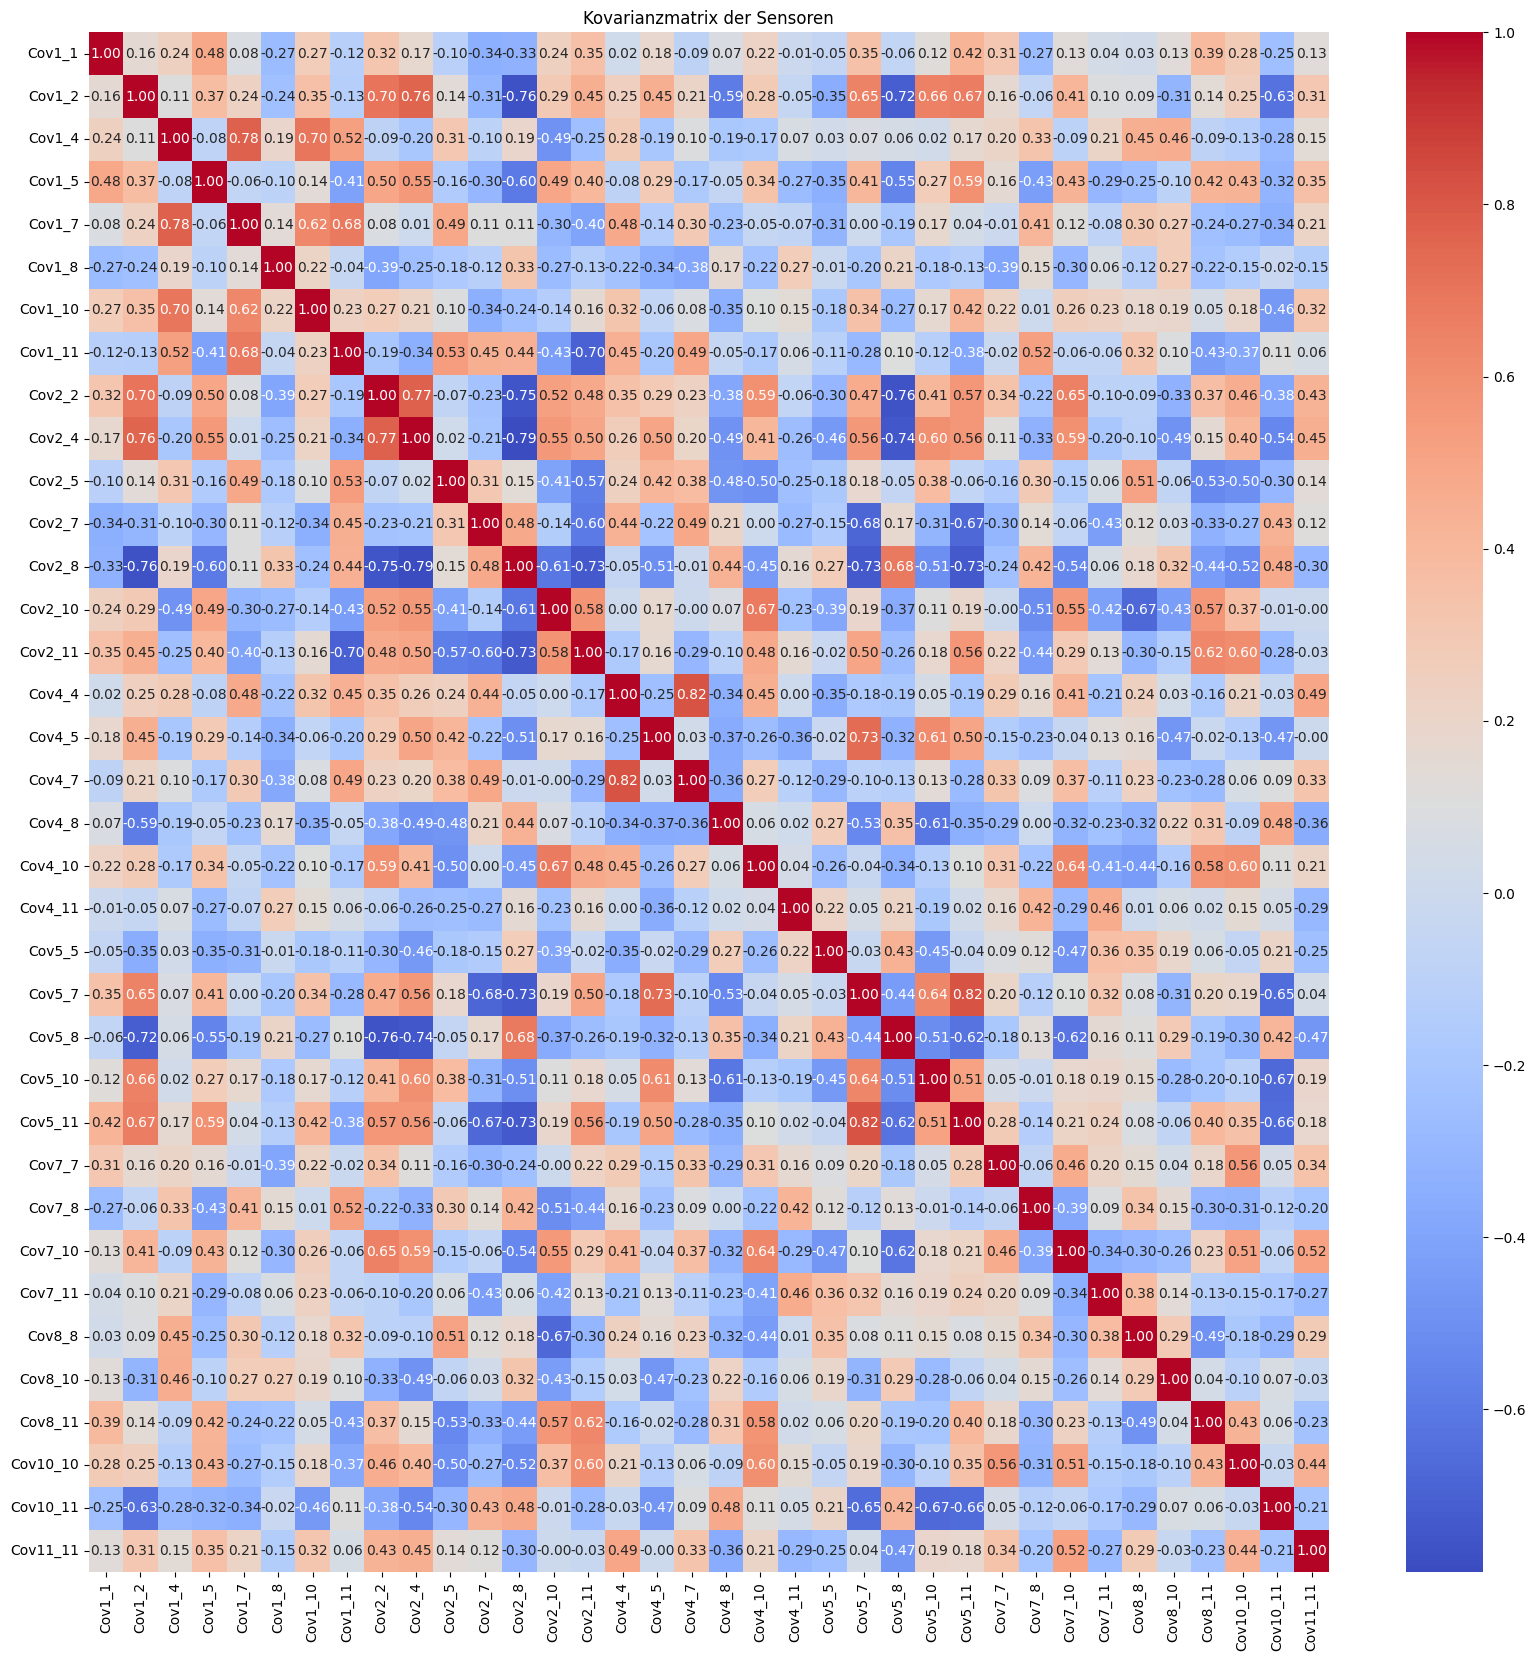

In [180]:
# Nur die Kovarianz-Spalten auswählen
cov_columns = [col for col in df.columns if "Cov" in col]
cov_matrix = df[cov_columns].corr()

# Heatmap zeichnen
plt.figure(figsize=(20,20))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Kovarianzmatrix der Sensoren")
plt.show()

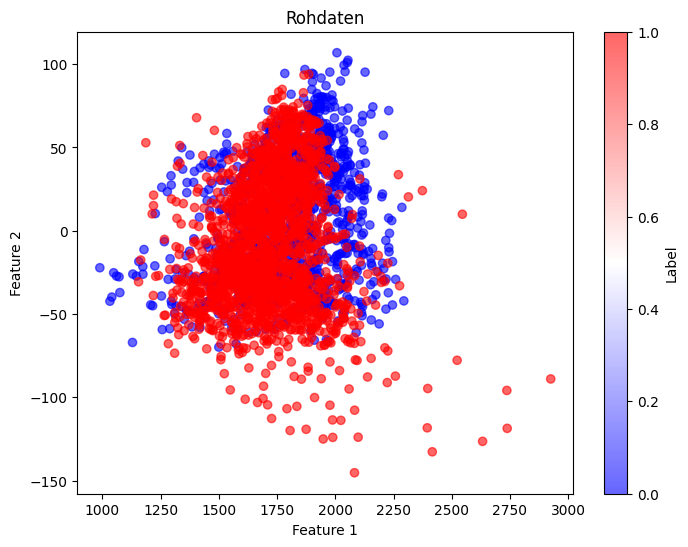

In [151]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Cov1_1'], df['Cov1_2'], c=df['label'], cmap='bwr', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Rohdaten')
plt.colorbar(label='Label')
plt.show()

In [152]:
from sklearn.preprocessing import StandardScaler

# Features und Label definieren
features = df.drop(columns=["label", "novelty_index"])  # Alle außer Label und alten Novelty-Index
y = df["label"]  # Zielvariable (0 = gesund, 1 = Schaden)

# Standardisierung
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# DataFrame mit standardisierten Werten erstellen
df_scaled = pd.DataFrame(X_scaled, columns=features.columns)
df_scaled["label"] = y  # Label wieder hinzufügen


In [153]:
df_scaled.columns

Index(['Cov1_1', 'Cov1_2', 'Cov1_4', 'Cov1_5', 'Cov1_7', 'Cov1_8', 'Cov1_10',
       'Cov1_11', 'Cov2_2', 'Cov2_4', 'Cov2_5', 'Cov2_7', 'Cov2_8', 'Cov2_10',
       'Cov2_11', 'Cov4_4', 'Cov4_5', 'Cov4_7', 'Cov4_8', 'Cov4_10', 'Cov4_11',
       'Cov5_5', 'Cov5_7', 'Cov5_8', 'Cov5_10', 'Cov5_11', 'Cov7_7', 'Cov7_8',
       'Cov7_10', 'Cov7_11', 'Cov8_8', 'Cov8_10', 'Cov8_11', 'Cov10_10',
       'Cov10_11', 'Cov11_11', 'WindSpeed', 'DC1_RPM', 'DC2_RPM',
       'Wind_Direction', 'Temperature', 'Preciptation', 'Generator_on_off',
       'Power_kW', 'Pitch_deg', 'Yaw', 'Azimuth', 'label'],
      dtype='object')

# Features auswahl

In [154]:
features_Cov_1_11 = df[['Cov1_1', 'Cov1_2', 'Cov1_4', 'Cov1_5', 'Cov1_7', 'Cov1_8', 'Cov1_10','Cov1_11']]

features_Cov_2_12 = df[['Cov2_2', 'Cov2_4', 'Cov2_5', 'Cov2_7', 'Cov2_8', 'Cov2_10','Cov2_11']]

features_Cov_4_11 = df[['Cov4_4', 'Cov4_5', 'Cov4_7', 'Cov4_8', 'Cov4_10', 'Cov4_11']]

features_Cov_5_11 = df[['Cov5_5', 'Cov5_7', 'Cov5_8', 'Cov5_10', 'Cov5_11']]

features_Cov_7_11 = df[['Cov7_7', 'Cov7_8','Cov7_10', 'Cov7_11']]

features_Cov_8_11 = df[['Cov8_8', 'Cov8_10', 'Cov8_11']]

features_Cov_10_20 = df[['Cov10_10', 'Cov10_11']]

features_Cov_11_11 = df[['Cov11_11']]

# Szenario Auswahl

In [155]:
Wind_und_Leistungsdaten=df[['WindSpeed', 'Power_kW', 'DC1_RPM', 'DC2_RPM']]

Umweltbedingungen_und_Leistung = df[['Temperature', 'Preciptation', 'Power_kW']]

ausrichtung_und_Leistung = df[['Pitch_deg', 'Yaw', 'Azimuth', 'Power_kW']]


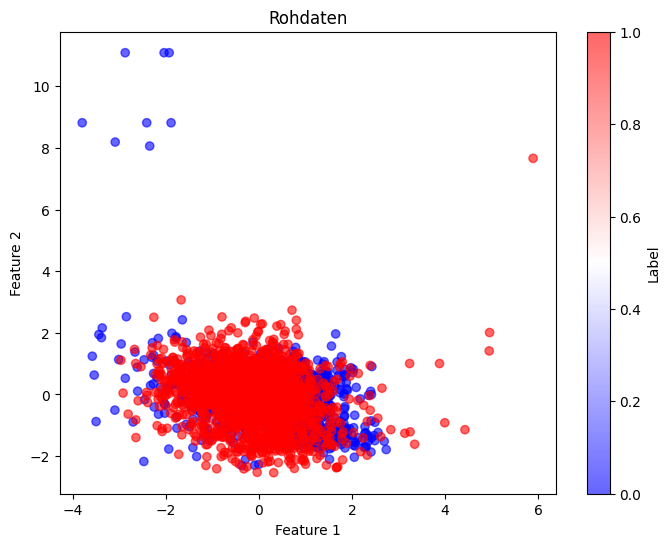

In [156]:
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Cov1_1'], df_scaled['WindSpeed'], c=df_scaled['label'], cmap='bwr', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Rohdaten')
plt.colorbar(label='Label')
plt.show()

In [157]:
import numpy as np

# Mittelwert der gesunden Daten berechnen (Referenzpunkt)
healthy_mean = df_scaled[df_scaled["label"] == 0].drop(columns=["label"]).mean()

# Euklidische Distanz für jeden Punkt berechnen
#df_scaled["novelty_index_new"] = np.linalg.norm(df_scaled.drop(columns=["label"]) - healthy_mean, axis=1)

In [158]:
df_scaled.columns

Index(['Cov1_1', 'Cov1_2', 'Cov1_4', 'Cov1_5', 'Cov1_7', 'Cov1_8', 'Cov1_10',
       'Cov1_11', 'Cov2_2', 'Cov2_4', 'Cov2_5', 'Cov2_7', 'Cov2_8', 'Cov2_10',
       'Cov2_11', 'Cov4_4', 'Cov4_5', 'Cov4_7', 'Cov4_8', 'Cov4_10', 'Cov4_11',
       'Cov5_5', 'Cov5_7', 'Cov5_8', 'Cov5_10', 'Cov5_11', 'Cov7_7', 'Cov7_8',
       'Cov7_10', 'Cov7_11', 'Cov8_8', 'Cov8_10', 'Cov8_11', 'Cov10_10',
       'Cov10_11', 'Cov11_11', 'WindSpeed', 'DC1_RPM', 'DC2_RPM',
       'Wind_Direction', 'Temperature', 'Preciptation', 'Generator_on_off',
       'Power_kW', 'Pitch_deg', 'Yaw', 'Azimuth', 'label'],
      dtype='object')

In [159]:
# columns auswählen

feature_cov_columns = [col for col in df.columns if "Cov" in col]

# Berechnen der Euklidischen Distanz um die Features zu Trennen

In [160]:
#Euklidische distaz

df_scaled['novelty_index_new'] = np.sqrt(((df_scaled[feature_cov_columns] - healthy_mean) ** 2).sum(axis=1))

In [161]:
#def euclidean_distance(df):
 #   return np.sqrt(((df_scaled[df] - healthy_mean[df]) ** 2).sum(axis=1))

In [162]:
def euclidean_distance(column_names):
    """ Berechnet die euklidische Distanz für eine gegebene Menge von Spaltennamen """
    common_columns = list(set(column_names) & set(healthy_mean.index))  # Gemeinsame Spalten finden
    return np.sqrt(((df_scaled[common_columns] - healthy_mean.loc[common_columns]) ** 2).sum(axis=1))


# Alle Euklidischen distanzen 

In [163]:
df_scaled_Euklidische_d  = {
    'dist_Cov_1': euclidean_distance(features_Cov_1_11),
    'dist_Cov_2': euclidean_distance(features_Cov_2_12),
    'dist_Cov_4': euclidean_distance(features_Cov_4_11),
    'dist_Cov_5': euclidean_distance(features_Cov_5_11),
    'dist_Cov_7': euclidean_distance(features_Cov_7_11),
    'dist_Cov_8': euclidean_distance(features_Cov_8_11),
    'dist_Cov_10': euclidean_distance(features_Cov_10_20),
    'dist_Cov_11': euclidean_distance(features_Cov_11_11),
    'dist_Cov_gesamt': euclidean_distance(feature_cov_columns),
    'Wind_und_Leistungsdaten':euclidean_distance(Wind_und_Leistungsdaten),
    'Umweltbedingungen_und_Leistung': euclidean_distance(Umweltbedingungen_und_Leistung),
    'ausrichtung_und_Leistung': euclidean_distance(ausrichtung_und_Leistung)

}

distances_df_scaled = pd.DataFrame(df_scaled_Euklidische_d)

In [165]:
print(df_scaled.columns)
print(healthy_mean.index)


Index(['Cov1_1', 'Cov1_2', 'Cov1_4', 'Cov1_5', 'Cov1_7', 'Cov1_8', 'Cov1_10',
       'Cov1_11', 'Cov2_2', 'Cov2_4', 'Cov2_5', 'Cov2_7', 'Cov2_8', 'Cov2_10',
       'Cov2_11', 'Cov4_4', 'Cov4_5', 'Cov4_7', 'Cov4_8', 'Cov4_10', 'Cov4_11',
       'Cov5_5', 'Cov5_7', 'Cov5_8', 'Cov5_10', 'Cov5_11', 'Cov7_7', 'Cov7_8',
       'Cov7_10', 'Cov7_11', 'Cov8_8', 'Cov8_10', 'Cov8_11', 'Cov10_10',
       'Cov10_11', 'Cov11_11', 'WindSpeed', 'DC1_RPM', 'DC2_RPM',
       'Wind_Direction', 'Temperature', 'Preciptation', 'Generator_on_off',
       'Power_kW', 'Pitch_deg', 'Yaw', 'Azimuth', 'label',
       'novelty_index_new'],
      dtype='object')
Index(['Cov1_1', 'Cov1_2', 'Cov1_4', 'Cov1_5', 'Cov1_7', 'Cov1_8', 'Cov1_10',
       'Cov1_11', 'Cov2_2', 'Cov2_4', 'Cov2_5', 'Cov2_7', 'Cov2_8', 'Cov2_10',
       'Cov2_11', 'Cov4_4', 'Cov4_5', 'Cov4_7', 'Cov4_8', 'Cov4_10', 'Cov4_11',
       'Cov5_5', 'Cov5_7', 'Cov5_8', 'Cov5_10', 'Cov5_11', 'Cov7_7', 'Cov7_8',
       'Cov7_10', 'Cov7_11', 'Cov8_8', 'Cov

In [166]:
df_scaled

,Cov1_1,Cov1_2,Cov1_4,Cov1_5,Cov1_7,Cov1_8,Cov1_10,Cov1_11,Cov2_2,Cov2_4,...,Wind_Direction,Temperature,Preciptation,Generator_on_off,Power_kW,Pitch_deg,Yaw,Azimuth,label,novelty_index_new
0,-0.717358,0.450638,-0.546826,-0.038076,-1.093025,-0.531832,-0.246411,-0.501913,0.617657,0.370724,...,1.010220,-0.563239,-0.048276,0.149263,-0.111220,-1.306359,0.120320,0.675489,0,4.043083
1,0.570193,0.326776,-0.198176,1.380743,-0.787369,0.596639,0.351869,-1.308239,0.010364,0.235043,...,1.122388,-0.582414,-0.048276,0.149263,-0.109078,-1.064490,0.068799,1.549598,0,4.315061
2,0.286492,0.157032,0.835460,-0.285135,1.301717,-0.193051,1.161660,1.554666,0.972124,-0.105311,...,1.070319,-0.586609,-0.048276,0.149263,-0.108735,-2.600972,0.074320,0.085054,0,4.484005
3,-0.303606,-1.000097,1.207171,-0.263699,0.531931,1.672995,1.287116,-0.354601,-1.141057,-1.166664,...,1.185310,-0.601176,-0.048276,0.149263,-0.108328,-2.909166,0.119460,-0.443842,0,5.762891
4,-0.589937,-0.944818,-0.351051,-0.145600,-0.963442,0.505153,0.187100,-1.174939,-0.535700,-0.325942,...,1.076832,-0.620440,-0.048276,0.149263,-0.110835,-2.913692,0.154831,-0.512486,0,5.475922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,0.892276,0.616187,-0.933027,-0.877731,0.055989,-1.337409,-1.497290,-0.082724,0.874007,0.264219,...,0.067907,-0.160093,-0.048276,0.149263,-0.155522,0.471541,0.133035,-0.445770,1,6.276630
2923,1.102406,0.104041,-0.523083,-0.613835,-0.136090,-0.458837,-1.381680,-0.586588,-0.233738,-0.381250,...,0.068135,-0.160061,-0.048276,0.149263,-0.155115,0.584729,0.128241,-0.440975,1,7.027407
2924,0.653294,0.493129,-0.021797,-0.272641,0.150056,0.079400,-1.234739,-1.049389,0.065284,-0.242112,...,0.059176,-0.167719,-0.048276,0.149263,-0.152844,-0.236881,0.130559,-0.364547,1,7.647083
2925,0.679411,1.480011,0.890941,-0.077424,0.883372,0.757953,-0.206683,-0.729257,0.881701,0.231485,...,0.011690,-0.166356,-0.048276,0.149263,-0.150724,-0.323846,0.126836,-0.036093,1,7.937343


In [167]:
distances_df_scaled

,dist_Cov_1,dist_Cov_2,dist_Cov_4,dist_Cov_5,dist_Cov_7,dist_Cov_8,dist_Cov_10,dist_Cov_11,dist_Cov_gesamt,Wind_und_Leistungsdaten,Umweltbedingungen_und_Leistung,ausrichtung_und_Leistung
0,1.718542,1.271212,1.811563,1.031030,1.264619,1.676713,0.372937,1.697839,4.043083,0.595493,0.194316,1.425466
1,1.898052,1.036312,1.966461,1.354934,2.354263,0.895348,0.929498,1.015984,4.315061,1.032682,0.178139,1.854217
2,2.632563,1.870577,1.570714,1.608342,0.957616,1.561161,0.365092,1.065553,4.484005,1.114335,0.174768,2.542041
3,2.811628,2.997144,2.491623,1.805602,1.304709,1.899583,0.302316,1.205128,5.762891,1.207952,0.163919,2.882713
4,2.092628,1.712366,2.365206,2.644214,1.665929,1.883469,0.533828,1.865641,5.475922,6.181834,0.152890,2.899808
...,...,...,...,...,...,...,...,...,...,...,...,...
2922,2.718027,0.905030,1.776438,2.168377,4.485138,0.946778,1.509891,0.197792,6.276630,0.412107,0.580153,0.719165
2923,2.158438,1.315386,2.403362,2.736170,4.966219,1.687738,1.390325,0.536453,7.027407,0.581806,0.580069,0.803655
2924,1.831325,1.674759,2.350378,2.873916,5.169751,2.733674,2.039008,0.422823,7.647083,0.396499,0.572082,0.441123
2925,2.109194,2.170028,2.101205,2.119062,4.952509,3.546249,2.716645,0.674402,7.937343,0.374914,0.572800,0.321670


In [168]:
# Erstellen der "label"-Spalte
distances_df_scaled['label'] = 0  # Setze alle Zeilen auf 0
distances_df_scaled.loc[1000:, 'label'] = 1  # Setze Zeilen ab Index 1000 auf 1

In [169]:
df_scaled.columns

Index(['Cov1_1', 'Cov1_2', 'Cov1_4', 'Cov1_5', 'Cov1_7', 'Cov1_8', 'Cov1_10',
       'Cov1_11', 'Cov2_2', 'Cov2_4', 'Cov2_5', 'Cov2_7', 'Cov2_8', 'Cov2_10',
       'Cov2_11', 'Cov4_4', 'Cov4_5', 'Cov4_7', 'Cov4_8', 'Cov4_10', 'Cov4_11',
       'Cov5_5', 'Cov5_7', 'Cov5_8', 'Cov5_10', 'Cov5_11', 'Cov7_7', 'Cov7_8',
       'Cov7_10', 'Cov7_11', 'Cov8_8', 'Cov8_10', 'Cov8_11', 'Cov10_10',
       'Cov10_11', 'Cov11_11', 'WindSpeed', 'DC1_RPM', 'DC2_RPM',
       'Wind_Direction', 'Temperature', 'Preciptation', 'Generator_on_off',
       'Power_kW', 'Pitch_deg', 'Yaw', 'Azimuth', 'label',
       'novelty_index_new'],
      dtype='object')

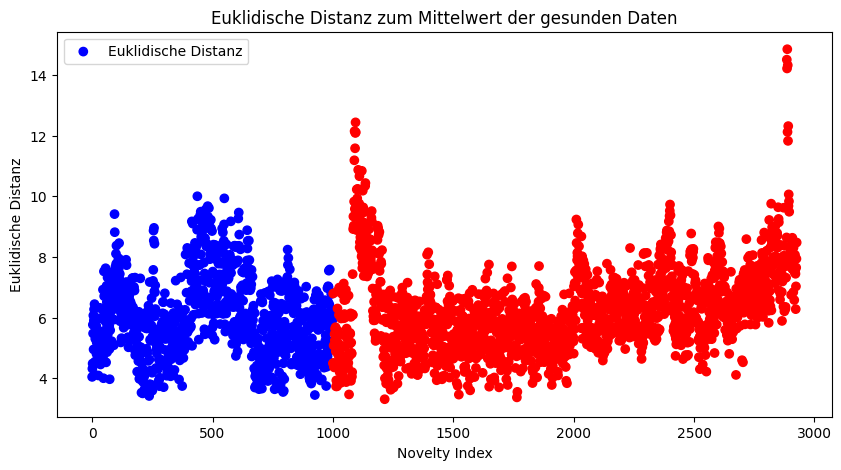

In [170]:
#df_scaled['novelety_index_new'] = np.sqrt(((df_scaled[columns] - mean_healthy) ** 2).sum(axis=1))

plt.figure(figsize=(10, 5))
plt.scatter(range(len(df_scaled)), df_scaled['novelty_index_new'], c=df_scaled['label'], cmap='bwr', label='Euklidische Distanz')
plt.xlabel('Novelty Index')
plt.ylabel('Euklidische Distanz')
plt.title('Euklidische Distanz zum Mittelwert der gesunden Daten')
plt.legend()
plt.show()

Dropdown(description='Spalte:', index=4, options=('dist_Cov_1', 'dist_Cov_2', 'dist_Cov_4', 'dist_Cov_5', 'dis…

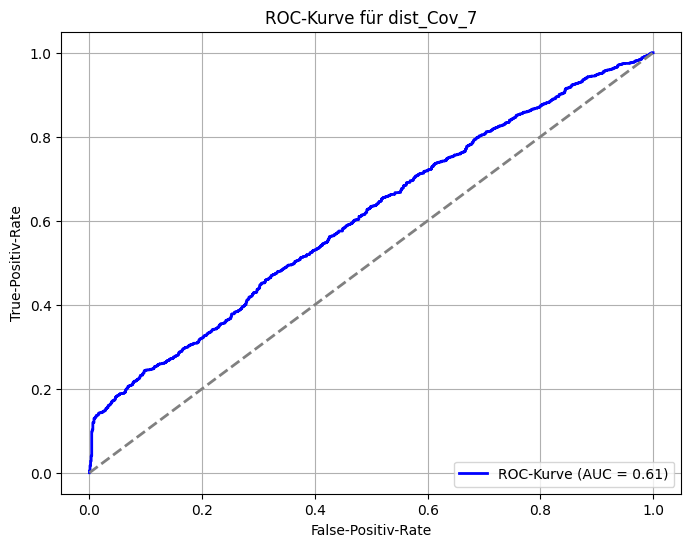

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import ipywidgets as widgets
from IPython.display import display, clear_output

# Angenommen, Ihr DataFrame heißt 'distances_df'
# ... (Ihr DataFrame wird hier geladen oder erstellt) ...

def plot_roc_curve(column_name):
    """Plotet die ROC-Kurve für die ausgewählte Spalte."""
    fpr, tpr, _ = roc_curve(distances_df_scaled['label'], distances_df_scaled[column_name])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC-Kurve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlabel('False-Positiv-Rate')
    plt.ylabel('True-Positiv-Rate')
    plt.title(f'ROC-Kurve für {column_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

def on_column_change(change):
    """Wird aufgerufen, wenn die ausgewählte Spalte geändert wird."""
    clear_output()
    display(column_dropdown)
    plot_roc_curve(change.new)

# Erstellen des Dropdown-Menüs
column_dropdown = widgets.Dropdown(
    options=list(distances_df_scaled.columns),
    description='Spalte:',
    disabled=False,
)

# Verbinden des Dropdown-Menüs mit der Funktion on_column_change
column_dropdown.observe(on_column_change, names='value')

# Anzeigen des Dropdown-Menüs und des ersten Plots
display(column_dropdown)
plot_roc_curve(column_dropdown.value)

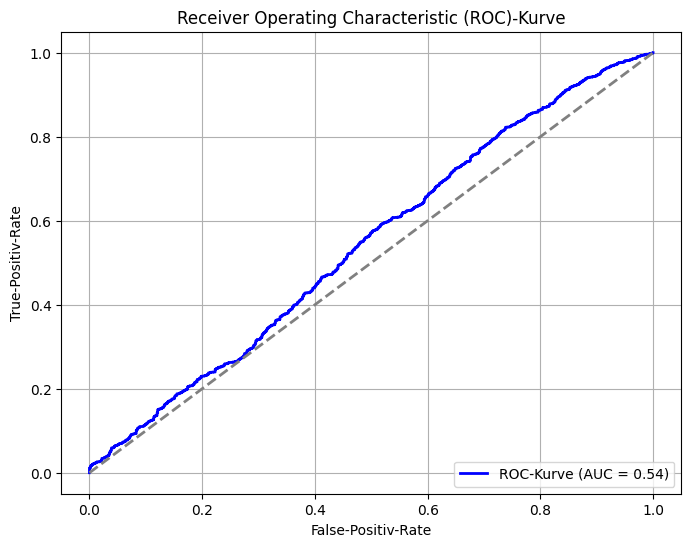

In [175]:
fpr, tpr, _ = roc_curve(df_scaled['label'], df_scaled['novelty_index_new'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC-Kurve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False-Positiv-Rate')
plt.ylabel('True-Positiv-Rate')
plt.title('Receiver Operating Characteristic (ROC)-Kurve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

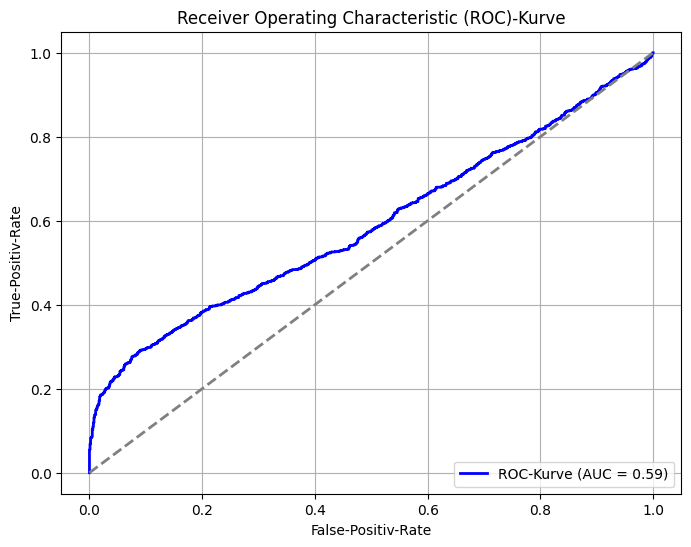

In [176]:
fpr, tpr, _ = roc_curve(df_scaled['label'], df['novelty_index'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC-Kurve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False-Positiv-Rate')
plt.ylabel('True-Positiv-Rate')
plt.title('Receiver Operating Characteristic (ROC)-Kurve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [177]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(df)), df['novelty_index'], c=df['label'], cmap='bwr', label='Euklidische Distanz')
plt.xlabel('Novelty Index')
plt.ylabel('Euklidische Distanz')
plt.title('Euklidische Distanz zum Mittelwert der gesunden Daten des orginal df)
plt.legend()
plt.show()

SyntaxError: unterminated string literal (detected at line 5) (2131262155.py, line 5)

In [118]:
normalized_df['Euclidean_Distance'] = np.sqrt(((normalized_df[columns] - mean_healthy) ** 2).sum(axis=1))

plt.figure(figsize=(10, 5))
plt.scatter(range(len(normalized_df)), normalized_df['Euclidean_Distance'], c=normalized_df['Label'], cmap='bwr', label='Euklidische Distanz')
plt.xlabel('Novelty Index')
plt.ylabel('Euklidische Distanz')
plt.title('Euklidische Distanz zum Mittelwert der gesunden Daten')
plt.legend()
plt.show()

NameError: name 'columns' is not defined

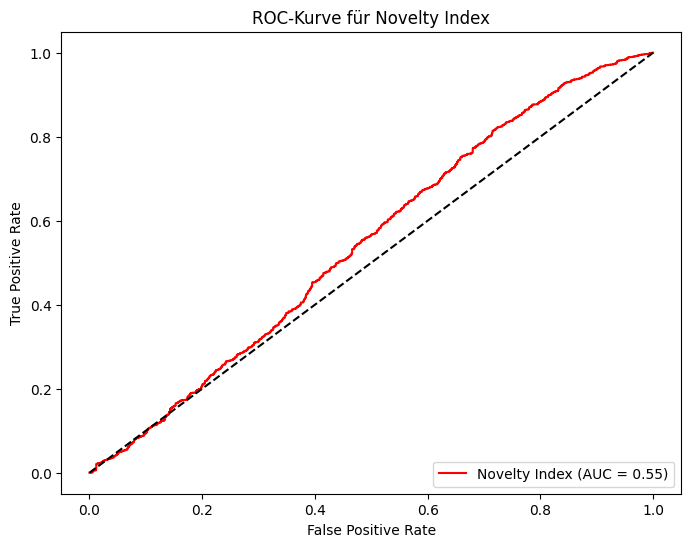

Neue AUC für Novelty Index: 0.55


In [77]:


# ROC-Kurve für den neuen Novelty-Index
fpr, tpr, _ = roc_curve(df_scaled["label"], df_scaled["novelty_index_new"])
roc_auc = auc(fpr, tpr)

# ROC-Kurve zeichnen
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Novelty Index (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Zufallslinie
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Kurve für Novelty Index')
plt.legend(loc='lower right')
plt.show()

print(f"Neue AUC für Novelty Index: {roc_auc:.2f}")


In [78]:
best_auc = roc_auc
best_feature = "novelty_index_new"

# Teste alle anderen Features
for feature in df_scaled.drop(columns=["label"]).columns:
    fpr, tpr, _ = roc_curve(df_scaled["label"], df_scaled[feature])
    feature_auc = auc(fpr, tpr)

    if feature_auc > best_auc:
        best_auc = feature_auc
        best_feature = feature

print(f"Bestes Schadensmerkmal: {best_feature} mit AUC = {best_auc:.2f}")


Bestes Schadensmerkmal: Temperature mit AUC = 0.81
